# Time Series Modeling Examples

In [1]:
import pandas as pd
from datetime import date
from datetime import timedelta
import plotly.graph_objects as go

import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import numpy as np
from IPython.display import clear_output
import time


# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose

## Function for Visualization

In [11]:
def print_ohlc(ticker_df, ticker_name):
    
    ticker_n = ticker_name
    start_date = ticker_df['date'].min()
    end_date = ticker_df['date'].max()

    
    
    fig = go.Figure(data=go.Ohlc(x=ticker_df.index,
                    open=ticker_df['open'],
                    high=ticker_df['high'],
                    low=ticker_df['low'],
                    close=ticker_df['close']))

    fig.update_layout(title_text='{} From {} to {}'.format(ticker_n, start_date, end_date),
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=True, xaxis_title="Time", yaxis_title="Price")
    
    fig.show()

## Read in the Data

In [12]:
inx_df = pd.read_csv('financial_data/GSPC_newdata.csv')
inx_df.head()

,date,volume,high,low,adj_close,close,open
0,2019-07-22,3003720000,2990.71,2976.65,2985.03,2985.03,2981.93
1,2019-07-23,3313660000,3005.90,2988.56,3005.47,3005.47,2994.74
2,2019-07-24,3428980000,3019.59,2996.82,3019.56,3019.56,2998.77
3,2019-07-25,3645270000,3016.31,2997.24,3003.67,3003.67,3016.26
4,2019-07-26,3257590000,3027.98,3012.59,3025.86,3025.86,3013.25


In [13]:
# View the S&P 500
print_ohlc(inx_df, '^GSPC')

## Make the Data Stationary

In [14]:
inx_df['date'] = pd.to_datetime(inx_df['date'])
inx_df = inx_df.set_index('date')
inx_df.head()

,volume,high,low,adj_close,close,open
date,,,,,,
2019-07-22,3003720000,2990.71,2976.65,2985.03,2985.03,2981.93
2019-07-23,3313660000,3005.90,2988.56,3005.47,3005.47,2994.74
2019-07-24,3428980000,3019.59,2996.82,3019.56,3019.56,2998.77
2019-07-25,3645270000,3016.31,2997.24,3003.67,3003.67,3016.26
2019-07-26,3257590000,3027.98,3012.59,3025.86,3025.86,3013.25


In [15]:
# Obtain the three series

# frequency detection error: https://github.com/statsmodels/statsmodels/issues/3503
decomposition = seasonal_decompose(inx_df['adj_close'], model='multiplicative', period = 5)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

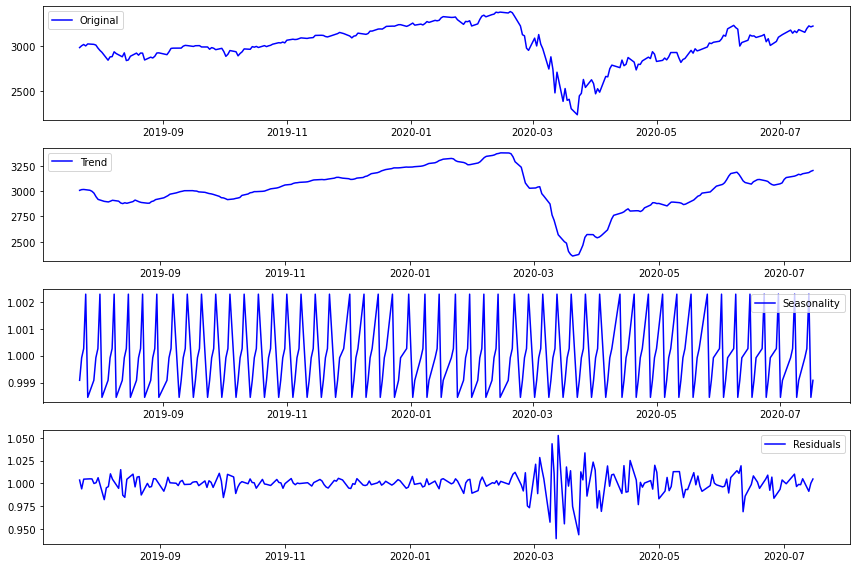

In [16]:
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(inx_df['adj_close'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

## Data Statistics

In [19]:
np.mean(residual)

0.9999358177777488

In [20]:
np.std(residual)

0.011981363089030946

In [24]:
aug_2019_series = residual['08-2019']
feb_2020_series = residual['02-2020']
print(np.mean(aug_2019_series), np.std(aug_2019_series))
print(np.mean(feb_2020_series), np.std(feb_2020_series))

0.9996171448145745 0.008704821661741444
0.998965686920868 0.010106918192315356
